In [14]:
%reset

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


In [17]:
import numpy as np
import matplotlib.pyplot as plt
import time
np.random.seed(1)
import keras.optimizers
from keras.models import Sequential
from keras.layers.core import Dense, Activation

outfile=np.load('class_data.npz')
X_train=outfile['X_train']
T_train=outfile['T_train']
X_test=outfile['X_test']
T_test=outfile['T_test']
X_range0=outfile['X_range0']
X_range1=outfile['X_range1']



Using TensorFlow backend.


ModuleNotFoundError: No module named 'tensorflow'

In [11]:
def Show_data(x,t):
    wk, n=t.shape
    c=[[0,0,0],[.5,.5,.5],[1,1,1]]

    for i in range(n):
        plt.plot(x[t[:,i]==1,0], x[t[:,i]==1,1],linestyle='none',marker='o',markeredgecolor='black',color=c[i],alpha=0.8)
    plt.grid(True)

In [12]:
np.random.seed(1)

model=Sequential()  
model.add(Dense(2, input_dim=2, activation='sigmoid', kernel_initializer='uniform')) 
model.add(Dense(3, activation='softmax', kernel_initializer='uniform'))  
sgd=keras.optimizers.SGD(lr=1,momentum=0.0, decay=0.0, nesterov=False)
model.compile(optimizer=sgd, loss='categorical_crossentropy', metrics=['accuracy'])

startTime=time.time()
history=model.fit(X_train, T_train, epochs=1000, batch_size=100, verbose=0, validation_data=(X_test, T_test))

score=model.evaluate(X_test, T_test, verbose=0)
print('cross entropy {0:.3f}, accuracy {1:3.2f}',format(score[0], score[1]))
calculation_time=time.time()-startTime
print("Calculation time: {0:.3f}sec",format(calculation_time))

NameError: name 'Sequential' is not defined

NameError: name 'history' is not defined

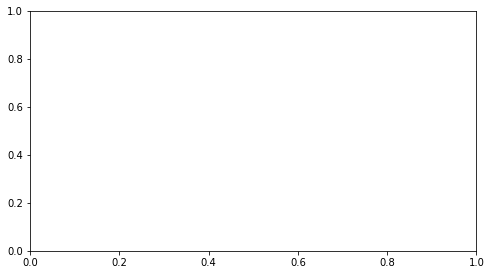

In [9]:
plt.figure(1,figsize=(8,15))
plt.subplots_adjust(wspace=0.5)

plt.subplot(3,1,1)
plt.plot(history.history['loss'], 'black', label='training')
plt.plot(history.history['var_loss'], 'cornflowerblue', label='test')
plt.legend()

plt.subplot(3,1,2)
plt.plot(history.history['accuracy'], 'black', label='training')
plt.plot(history.history['var_accuracy'], 'cornflowerblue', label='test')
plt.legend()

plt.subplot(3,1,3)
Show_data(X_test, T_test)
xn=60
x0=np.linspace(X_range0[0], X_range0[1],xn)
x0=np.linspace(X_range1[0], X_range1[1],xn)
xx0,xx1=np.meshgrid(x0,x1)
x=np.c_[np.reshape(xx0,xn*xn,1),np.reshape(xx1,xn*xn,1)]
y=model.predict(x)
K=3
for ic in range(K):
    f=y[:,ic]
    f=f.reshape(xn,xn)
    f=f.T
    cont=plt.contour(xx0,xx1,f,levels=[0.5,0.9], colors=['cornflowerblue','black'])
    cont.clabel(fmt='%1.1f',fontsize=9)
    plt.xlim(X_range0)
    plt.ylim(X_range1)
plt.show()
